In [1]:
import cv2
from skimage.transform import rescale
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops
import skimage
import numpy as np
from sklearn.cluster import KMeans
from skimage.util import img_as_float
from skimage.filters import gabor_kernel
from scipy import ndimage as ndi
from sklearn import preprocessing

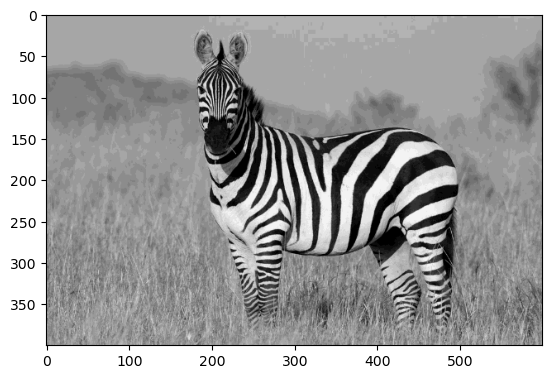

In [114]:
image = cv2.imread('HW04/img1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
image_rescaled = (rescale(image_gray, 0.6, anti_aliasing=False)*20).astype('uint8')
plt.imshow(image_rescaled, cmap='gray')

In [115]:
image_rescaled.max()

20

In [116]:
def power(image, kernel):
    image = (image - image.mean()) / image.std()
    return  np.sqrt(ndi.convolve(image, np.real(kernel), mode='wrap')**2 +
                   ndi.convolve(image, np.imag(kernel), mode='wrap')**2)

In [117]:
results = []
for theta in range(0, 8):
    theta1 = theta / 4. * np.pi
    for frequency in (0.1, 0.4,1,5,10,):
        kernel = gabor_kernel(frequency, theta=theta1 , sigma_x=12, sigma_y=12)
        results.append(power( image_rescaled, kernel))

In [118]:
results_array=np.array(results)

In [119]:
results_array = np.transpose(results_array, (1,2,0))
results_array.shape

(400, 600, 40)

In [120]:
h,w= results_array.shape[:2]
results_array = results_array.reshape(-1,results_array.shape[-1])
results_array = preprocessing.StandardScaler().fit_transform(results_array)

In [121]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(results_array)

Text(0.5, 1.0, 'k =3')

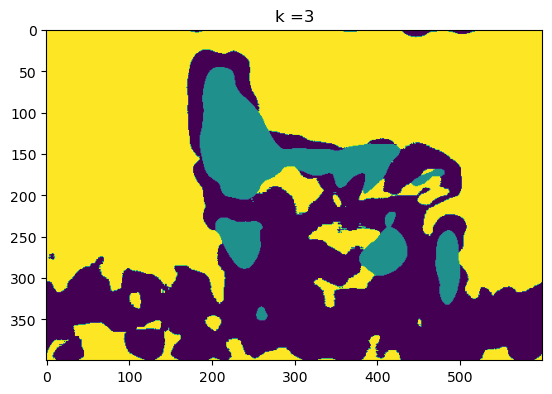

In [122]:
label = kmeans.fit_predict(results_array)
label = label.reshape(h,w)
plt.imshow(label)
plt.title('k =3')

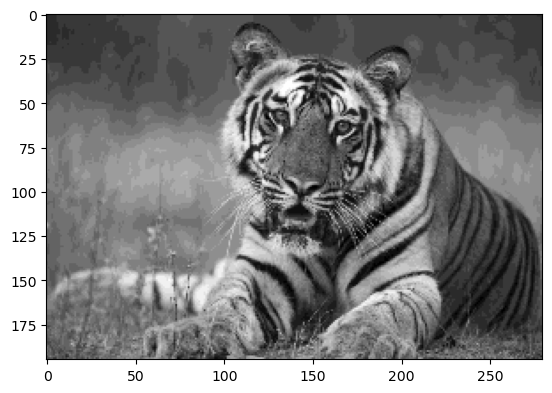

In [104]:
image = cv2.imread('HW04/img2.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
image_rescaled = (rescale(image_gray, 0.3, anti_aliasing=False)*20).astype('uint8')
plt.imshow(image_rescaled, cmap='gray')

In [105]:
image_rescaled.max()

18

In [106]:
results = []
for theta in range(0, 8):
    theta1 = theta / 4. * np.pi
    for frequency in (0.1, 0.4,1,5,10,):
        kernel = gabor_kernel(frequency, theta=theta1 , sigma_x=12, sigma_y=12)
        results.append(power( image_rescaled, kernel))

In [107]:
results_array=np.array(results)

In [108]:
results_array = np.transpose(results_array, (1,2,0))
results_array.shape

(195, 280, 40)

In [109]:
h,w= results_array.shape[:2]
results_array = results_array.reshape(-1,results_array.shape[-1])
results_array = preprocessing.StandardScaler().fit_transform(results_array)

In [112]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(results_array)

Text(0.5, 1.0, 'k =2')

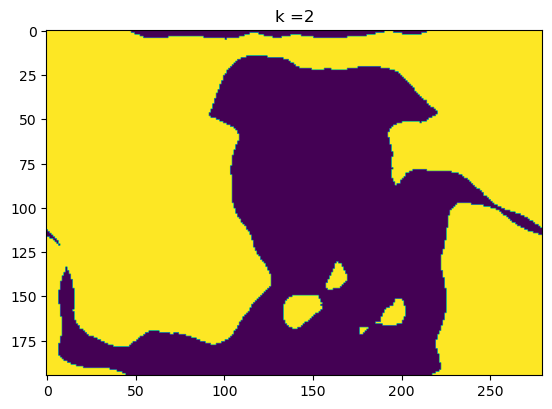

In [113]:
label = kmeans.fit_predict(results_array)
label = label.reshape(h,w)
plt.imshow(label)
plt.title('k =2')